In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import efficient_apriori
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import combinations
from efficient_apriori import apriori
import warnings
warnings.filterwarnings('ignore')

### Carregando os Dados

In [2]:
# Carrega os dados
dados_departamentos = pd.read_csv('departamentos.csv')
dados_corredores = pd.read_csv('corredores.csv')
dados_produtos = pd.read_csv('produtos.csv')
dados_pedidos = pd.read_csv('pedidos.csv')
dados_transacoes = pd.read_csv('transacoes.csv')

## Exploratória

#### Detalhes do Tamanho de Cada DataSet via Programação

In [3]:
conta_arrays = np.array([['dados_departamentos', len(dados_departamentos)],
                          ['dados_corredores', len(dados_corredores)],
                          ['dados_produtos', len(dados_produtos)],
                          ['dados_pedidos', len(dados_pedidos)],
                          ['dados_transacoes', len(dados_transacoes)]])

In [4]:
conta_arrays

array([['dados_departamentos', '21'],
       ['dados_corredores', '134'],
       ['dados_produtos', '49688'],
       ['dados_pedidos', '3421083'],
       ['dados_transacoes', '32434489']], dtype='<U19')

In [5]:
contagem = pd.DataFrame(conta_arrays, columns = ['Arquivo', 'Total de Registros'])

In [6]:
contagem

,Arquivo,Total de Registros
0,dados_departamentos,21
1,dados_corredores,134
2,dados_produtos,49688
3,dados_pedidos,3421083
4,dados_transacoes,32434489


In [7]:
dados_pedidos.isna().sum()/len(dados_pedidos) * 100

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

## Reorganização dos Dados
#### Merge das Tabelas

In [8]:
%%time
dados_transacoes = dados_transacoes.merge(dados_pedidos, on = 'order_id', how = 'left')
dados_transacoes = dados_transacoes.merge(dados_produtos, on = 'product_id', how = 'left')
dados_transacoes = dados_transacoes.merge(dados_corredores, on = 'aisle_id', how = 'left')
dados_transacoes = dados_transacoes.merge(dados_departamentos, on = 'department_id', how = 'left')

CPU times: total: 33.9 s
Wall time: 35.6 s


In [9]:
dados_transacoes

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


In [10]:
dados_corredores.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [11]:
dados_transacoes.isnull().sum() / len(dados_transacoes) * 100

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    6.40697
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
aisle                     0.00000
department                0.00000
dtype: float64

In [12]:
%%time
df_dsa = pd.DataFrame(dados_transacoes.groupby('order_id')['product_id'])

CPU times: total: 4min 3s
Wall time: 4min 10s


In [14]:
df_dsa.columns

RangeIndex(start=0, stop=2, step=1)

In [15]:
# Lista
prod = []

In [16]:
%%time
for i in range(len(df_dsa[0])):
    prod.append(list(df_dsa.iloc[i][1]))

CPU times: total: 2min 58s
Wall time: 3min 2s


In [17]:
df_dsa

,0,1
0,2,0 33120 1 28985 2 9327 3 45918 4 ...
1,3,9 33754 10 24838 11 17704 12 2190...
2,4,17 46842 18 26434 19 39758 20 2776...
3,5,30 13176 31 15005 32 47329 33 2796...
4,6,56 40462 57 15873 58 41897 Name: prod...
...,...,...
3214869,3421079,"32434455 30136 Name: product_id, dtype: int64"
3214870,3421080,32434456 27845 32434457 4932 32434458 ...
3214871,3421081,32434465 38185 32434466 12218 32434467 ...
3214872,3421082,32434472 17279 32434473 12738 32434474 ...


In [18]:
# Prepara o dataframe
transacoes = pd.DataFrame({'Id_Pedido' : df_dsa[0], 'Produtos' : prod})
transacoes

,Id_Pedido,Produtos
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"
...,...,...
3214869,3421079,[30136]
3214870,3421080,"[27845, 4932, 18811, 41950, 31717, 12935, 2512..."
3214871,3421081,"[38185, 12218, 32299, 3060, 20539, 35221, 12861]"
3214872,3421082,"[17279, 12738, 16797, 43352, 32700, 12023, 47941]"


# Perguntas

## Pergunta 1:

In [19]:
dados_pedidos

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [20]:
maximo =dados_pedidos.groupby("user_id")["order_number"].aggregate(np.max).reset_index()

In [21]:
maximo = maximo.order_number.value_counts()

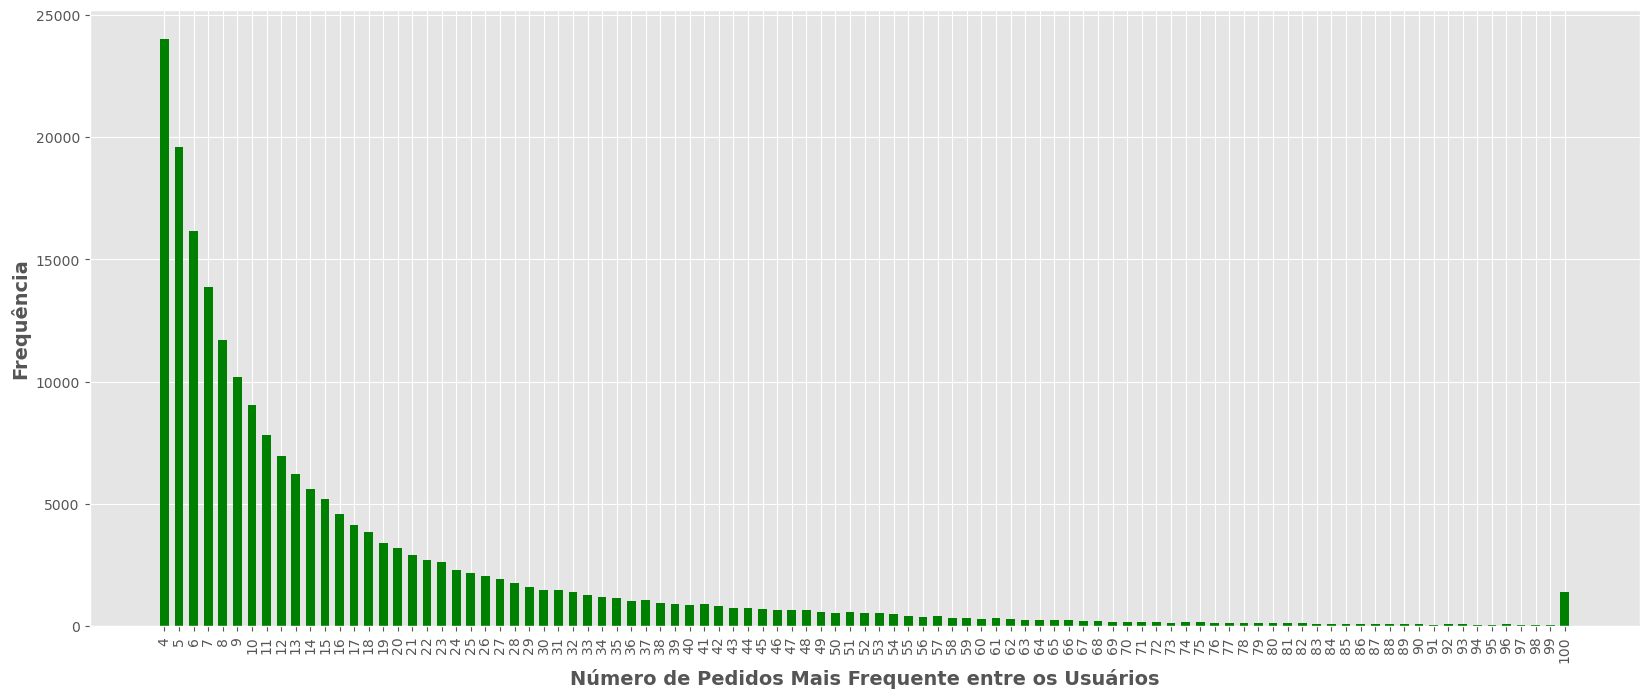

In [22]:
# Plot
plt.style.use('ggplot')
plt.figure(figsize = (20,8))
plt.bar(maximo.index, maximo.values, color = 'green', width = 0.6)
plt.xticks(maximo.index, rotation = 'vertical')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.xlabel('Número de Pedidos Mais Frequente entre os Usuários', fontsize = 14, fontweight = 'bold')
plt.show()

# Resposta:
> O número de pedido é o número 4

# Pergunta 2:

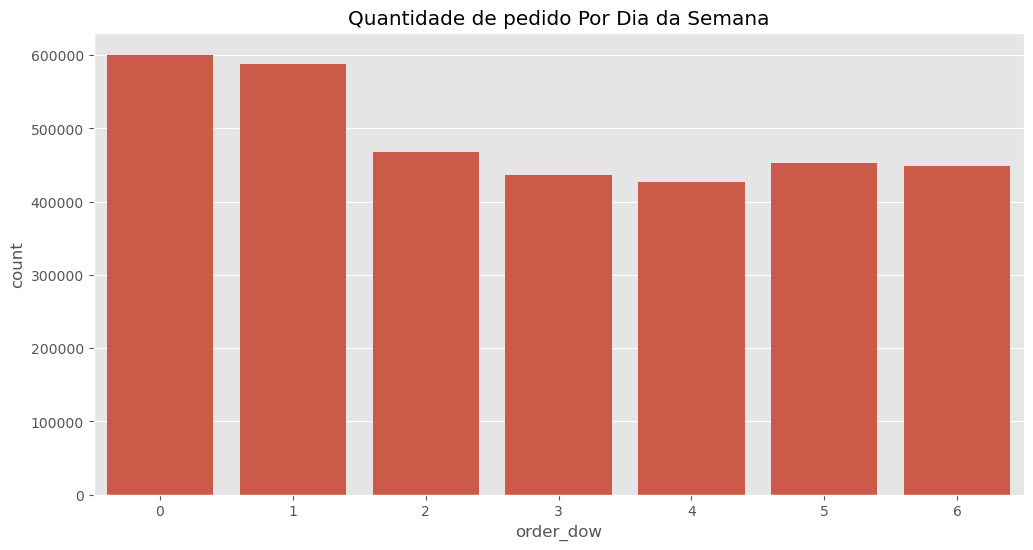

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(dados_pedidos, x = dados_pedidos['order_dow'])
plt.title("Quantidade de pedido Por Dia da Semana")
plt.show()

In [24]:
dados_pedidos['order_dow'].value_counts()

order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: count, dtype: int64

# Reposta:
> A dia que tem mais pedidos é o dia 0 (domingo)

# Pergunta 3:

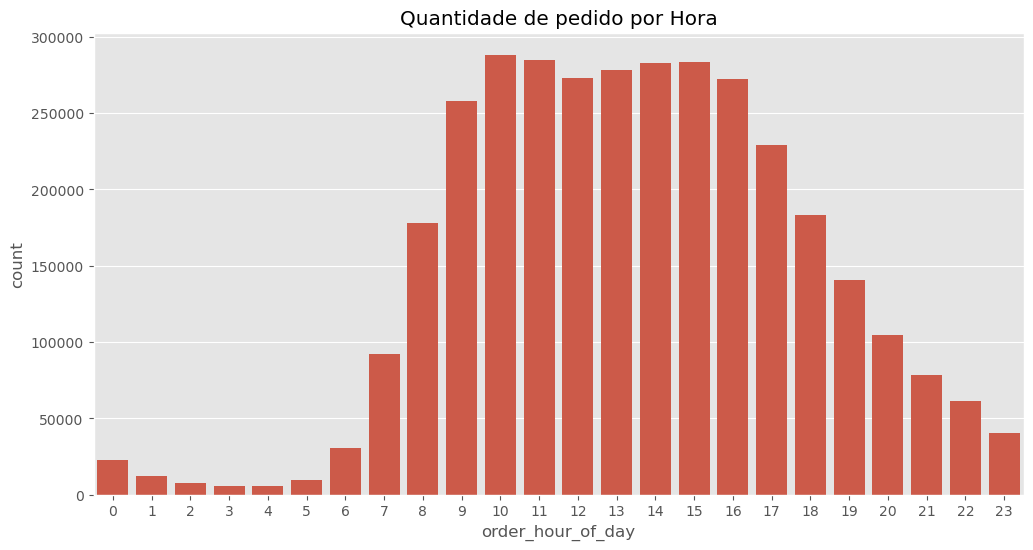

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(dados_pedidos, x = dados_pedidos['order_hour_of_day'])
plt.title("Quantidade de pedido por Hora")
plt.show()

In [26]:
dados_pedidos['order_dow'].value_counts()

order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: count, dtype: int64

# Resposta: 
> A hora que tem mais pedidos é 10 horas

# Pergunta 4:


In [27]:
dados_pedidos

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [28]:
dados_transacoes

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


In [29]:
# Deletando registros duplicados para contar as linhas única para cada pedido x departamento
df_pedidos_unicos = dados_transacoes.drop_duplicates(subset = ['order_number', 'department_id']) 

In [30]:
df_pedidos_unicos.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
9,3,33754,1,1,205970,prior,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
11,3,17704,3,1,205970,prior,16,5,17,12.0,Lemons,123,4,packaged vegetables fruits,produce


In [31]:
contagem_dp = dados_transacoes['department'].value_counts()

In [32]:
contagem_dp

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

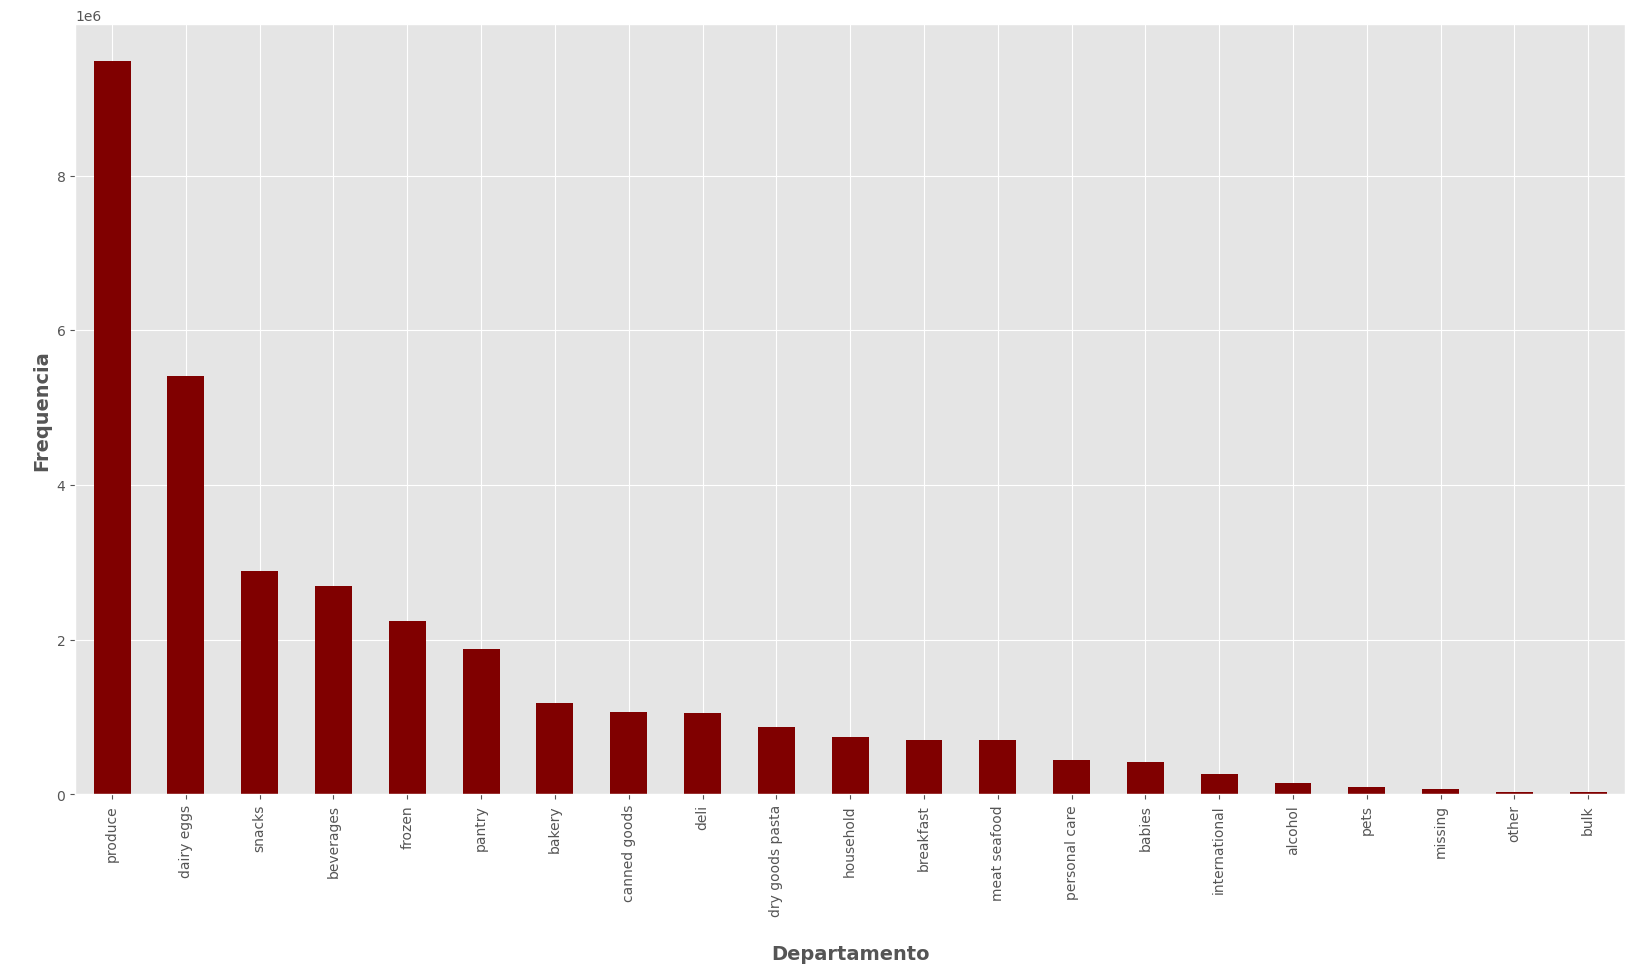

In [33]:
# Plot
fig = plt.figure(figsize = (20,10))
contagem_dp.plot(kind = 'bar', color = 'maroon')
plt.xticks(rotation = 90)
plt.xlabel('\nDepartamento', fontsize = 14, fontweight = 'bold')
plt.ylabel('\nFrequencia', fontsize = 14, fontweight = 'bold')
plt.show()

# Resposta: 
> O Departamento que mais tem pedidos é o produce

# Pergunta 5:

In [34]:
dados_transacoes

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


In [35]:
x1 = dados_transacoes['aisle'].value_counts().head(20)

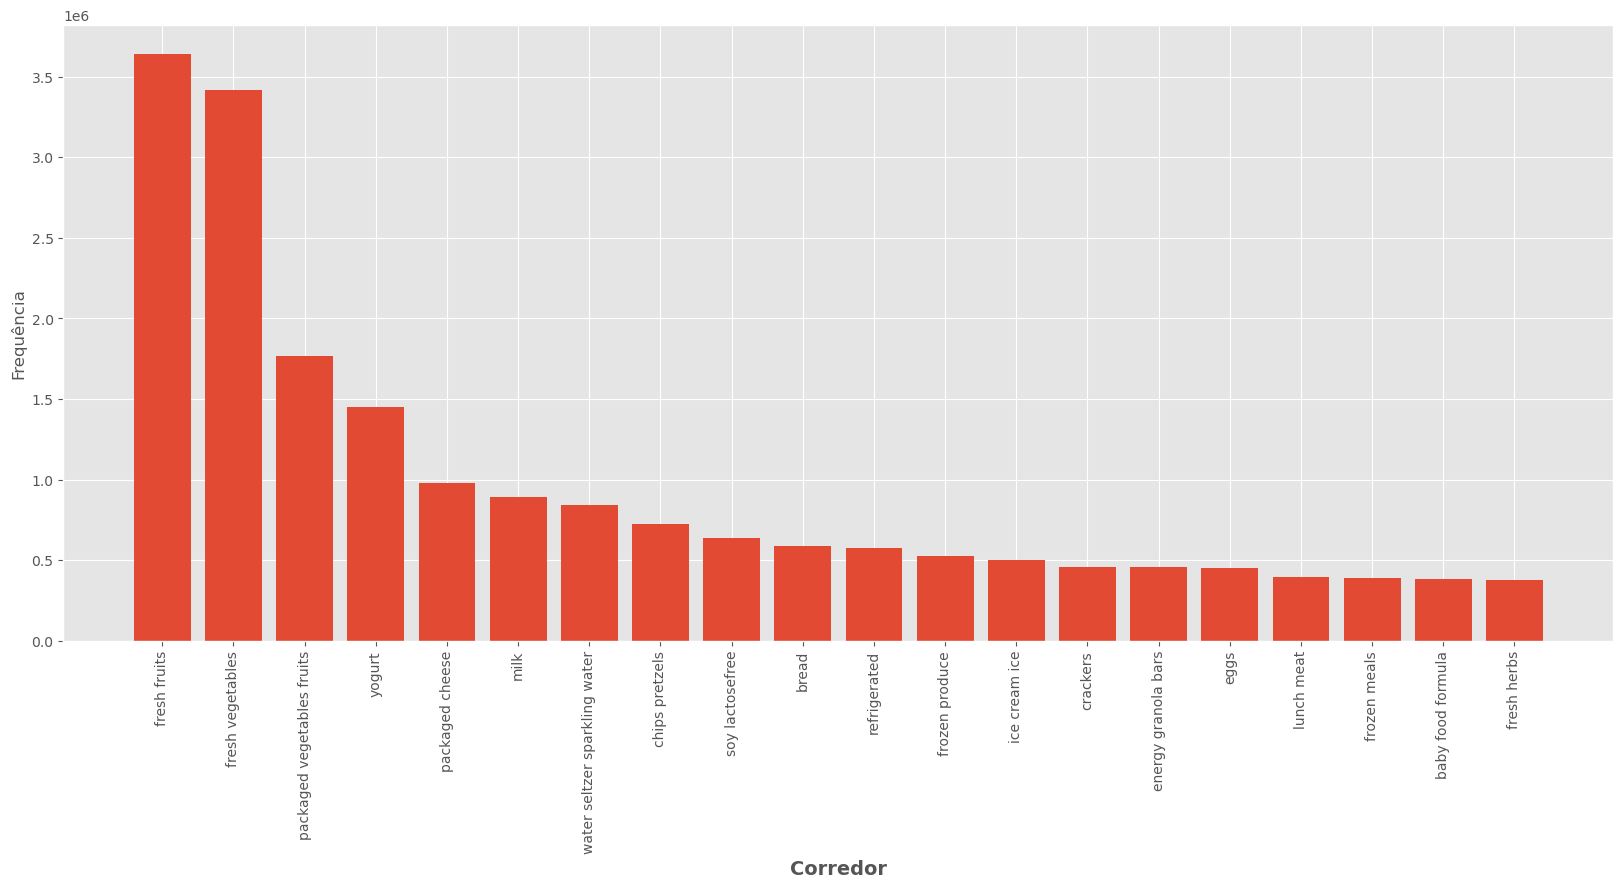

In [36]:
plt.figure(figsize = (20,8))
plt.bar(x1.index, x1)
plt.xticks(rotation = 90)
plt.xlabel("Corredor", fontsize = 14, fontweight = 'bold')
plt.ylabel("Frequência")
plt.show()

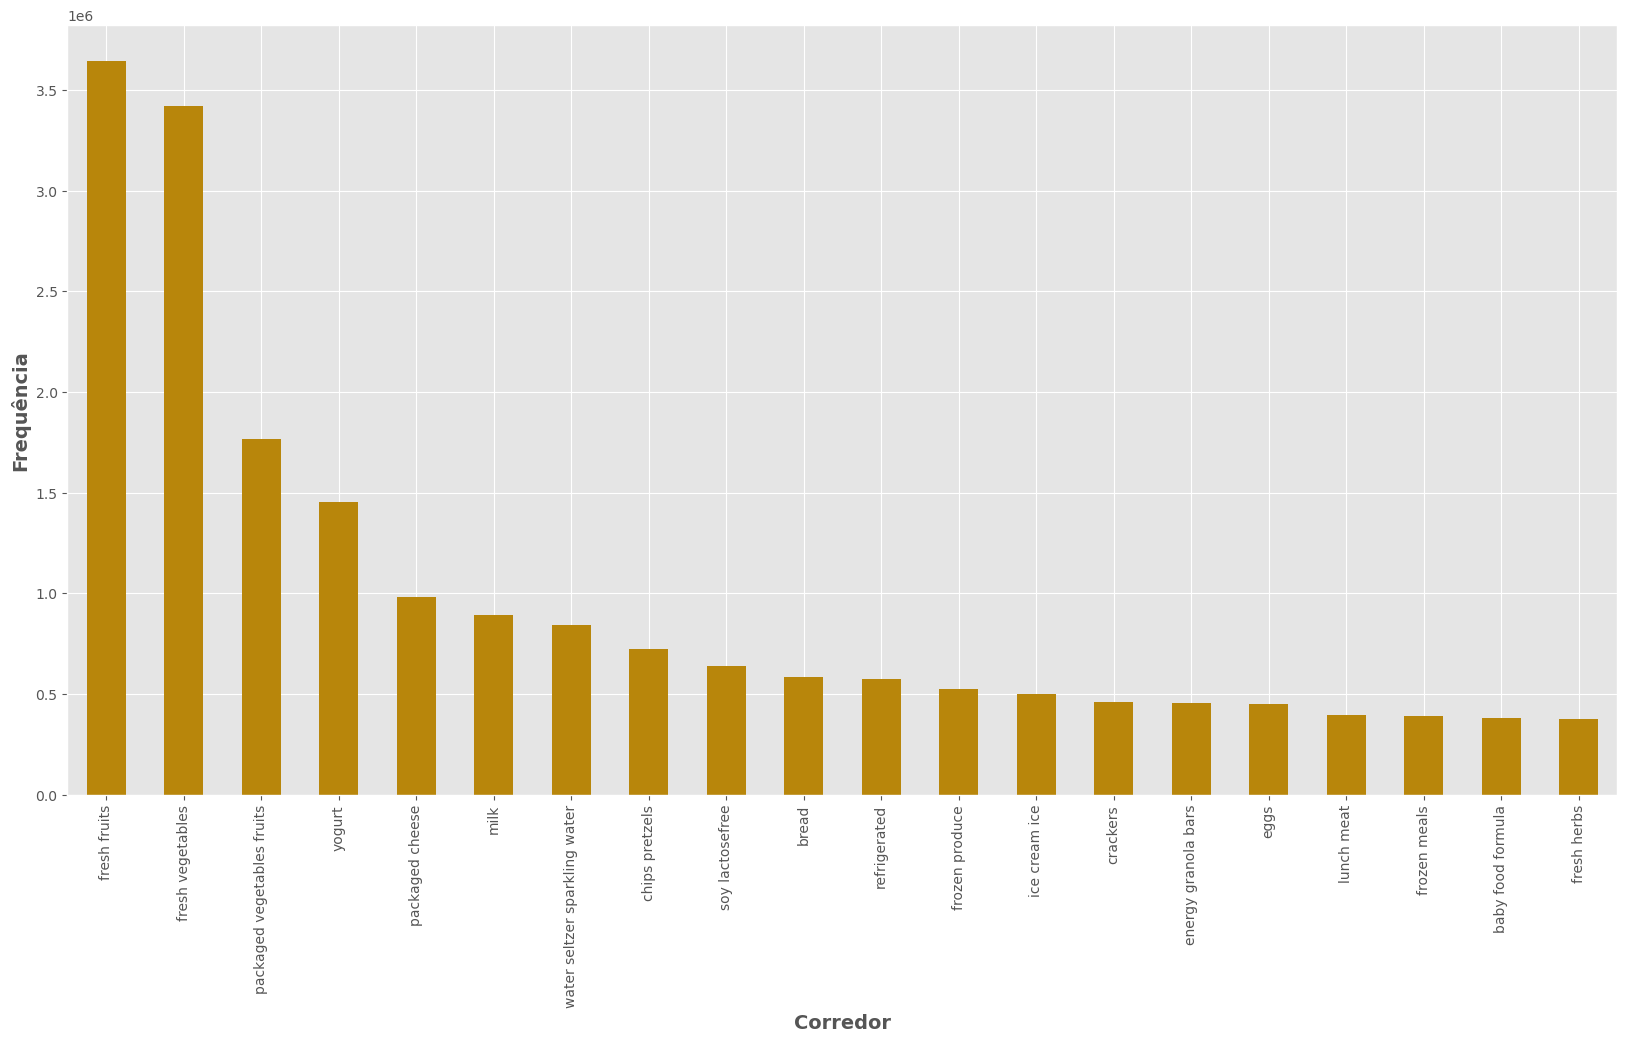

In [37]:
## Alternativa de resolução
fig = plt.figure(figsize = (20,10))
x1[0:20].plot(kind = 'bar', color = 'darkgoldenrod')
plt.xticks(rotation = 90)
plt.xlabel('Corredor', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.show()

# Resposta:
> Fresh fruits é o corredor que tem mais frequência de Pedidos

In [38]:
# Contar a frequência de cada produto em cadados_transacoes
frequencia_produtos = dados_transacoes['product_id'].value_counts()
frequencia_produtos

product_id
24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
14756         1
20264         1
31254         1
13397         1
23624         1
Name: count, Length: 49677, dtype: int64

In [39]:
#Criar um dicionário para mapear product_id para aisle_id
produtos_para_corredor = dict(zip(dados_produtos['product_id'], dados_produtos['aisle_id']))

In [40]:
#Criar um dicionário para mapear aisle_id para o nome do corredor
id_para_nome_corredor = dict(zip(dados_corredores['aisle_id'], dados_corredores['aisle']))
id_para_nome_corredor

{1: 'prepared soups salads',
 2: 'specialty cheeses',
 3: 'energy granola bars',
 4: 'instant foods',
 5: 'marinades meat preparation',
 6: 'other',
 7: 'packaged meat',
 8: 'bakery desserts',
 9: 'pasta sauce',
 10: 'kitchen supplies',
 11: 'cold flu allergy',
 12: 'fresh pasta',
 13: 'prepared meals',
 14: 'tofu meat alternatives',
 15: 'packaged seafood',
 16: 'fresh herbs',
 17: 'baking ingredients',
 18: 'bulk dried fruits vegetables',
 19: 'oils vinegars',
 20: 'oral hygiene',
 21: 'packaged cheese',
 22: 'hair care',
 23: 'popcorn jerky',
 24: 'fresh fruits',
 25: 'soap',
 26: 'coffee',
 27: 'beers coolers',
 28: 'red wines',
 29: 'honeys syrups nectars',
 30: 'latino foods',
 31: 'refrigerated',
 32: 'packaged produce',
 33: 'kosher foods',
 34: 'frozen meat seafood',
 35: 'poultry counter',
 36: 'butter',
 37: 'ice cream ice',
 38: 'frozen meals',
 39: 'seafood counter',
 40: 'dog food care',
 41: 'cat food care',
 42: 'frozen vegan vegetarian',
 43: 'buns rolls',
 44: 'eye ea

In [41]:
#Criar um dicionário para mapear product_id para aisle_id
produtos_para_corredor = dict(zip(dados_produtos['product_id'], dados_produtos['aisle_id']))
produtos_para_corredor

#Criar um dicionário para mapear aisle_id para o nome do corredor
id_para_nome_corredor = dict(zip(dados_corredores['aisle_id'], dados_corredores['aisle']))
id_para_nome_corredor

# Calcular a frequência de cada corredor
frequencia_corredores = {}
for produto, freq in frequencia_produtos.items():
    corredor_id = produtos_para_corredor.get(produto)
    if corredor_id:
        corredor_nome = id_para_nome_corredor.get(corredor_id, "Corredor Desconhecido")
        frequencia_corredores[corredor_nome] = frequencia_corredores.get(corredor_nome, 0) + freq

#Ordenar os corredores por frequência e pegar os 20 principais
principais_corredores = sorted(frequencia_corredores.items(), key = lambda x: x[1], reverse=True)[:20]

#Exibir os 20 principais corredores
for corredor, freq in principais_corredores:
    print(f'Corredor: {corredor}, Frequência {freq}')

Corredor: fresh fruits, Frequência 3642188
Corredor: fresh vegetables, Frequência 3418021
Corredor: packaged vegetables fruits, Frequência 1765313
Corredor: yogurt, Frequência 1452343
Corredor: packaged cheese, Frequência 979763
Corredor: milk, Frequência 891015
Corredor: water seltzer sparkling water, Frequência 841533
Corredor: chips pretzels, Frequência 722470
Corredor: soy lactosefree, Frequência 638253
Corredor: bread, Frequência 584834
Corredor: refrigerated, Frequência 575881
Corredor: frozen produce, Frequência 522654
Corredor: ice cream ice, Frequência 498425
Corredor: crackers, Frequência 458838
Corredor: energy granola bars, Frequência 456386
Corredor: eggs, Frequência 452134
Corredor: lunch meat, Frequência 395130
Corredor: frozen meals, Frequência 390299
Corredor: baby food formula, Frequência 382456
Corredor: fresh herbs, Frequência 377741


# Pergunta 6:


In [42]:
dados_transacoes.groupby('product_name')['order_id'].count().sort_values(ascending = False)

product_name
Banana                                                    472565
Bag of Organic Bananas                                    379450
Organic Strawberries                                      264683
Organic Baby Spinach                                      241921
Organic Hass Avocado                                      213584
                                                           ...  
Pure Performance Restorative Shampoo Chamomile & Honey         1
Lindor Peppermint White Chocolate Truffles                     1
Dynostix Rawhide Chew With Meat                                1
Max White With Polishing Star Soft Toothbrush                  1
Cajun Sides Dirty Rice                                         1
Name: order_id, Length: 49677, dtype: int64

In [43]:
#Alternativo
produtos = dados_transacoes['product_name'].value_counts().head(20)

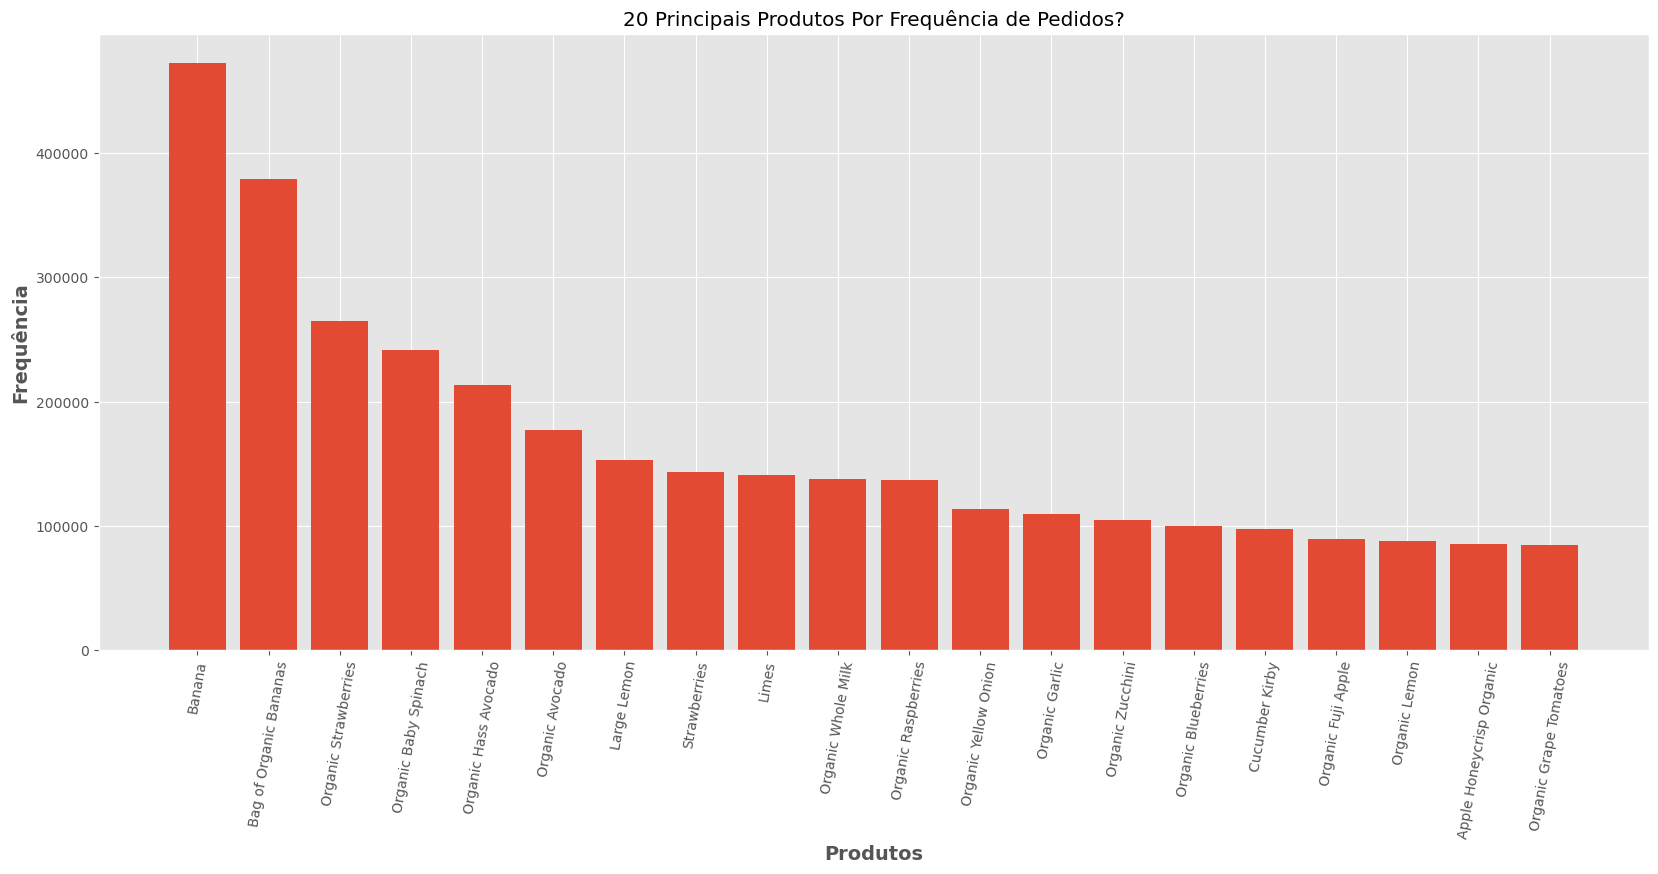

In [44]:
plt.figure(figsize = (20,8))
plt.bar(produtos.index, produtos)
plt.title("20 Principais Produtos Por Frequência de Pedidos?")
plt.xticks(rotation = 80)
plt.xlabel("Produtos", fontsize =14, fontweight = 'bold')
plt.ylabel("Frequência", fontsize = 14, fontweight = 'bold')
plt.show()

# Resposta:
> Banana é o produto que tem mais frequência de Pedidos

# Pergunta 7:


In [45]:
%%time
df_temp1 = dados_transacoes.groupby('product_name')['reordered'].agg(['count', 'sum']).rename(columns = {'count':'total', 'sum': 'reorders'})
df_temp1 = df_temp1.sort_values('total', ascending = False).reset_index()

CPU times: total: 5.12 s
Wall time: 5.39 s


In [46]:
df_temp1.head(20)

,product_name,total,reorders
0,Banana,472565,398609
1,Bag of Organic Bananas,379450,315913
2,Organic Strawberries,264683,205845
3,Organic Baby Spinach,241921,186884
4,Organic Hass Avocado,213584,170131
5,Organic Avocado,176815,134044
6,Large Lemon,152657,106255
7,Strawberries,142951,99802
8,Limes,140627,95768
9,Organic Whole Milk,137905,114510


In [47]:
#Prepara as listas com os 20 top registros (para não poluir o gráfico)
labels = list(df_temp1.product_name[0:20])
reorder = list(df_temp1.reorders[0:20])
total = list(df_temp1.total[0:20])

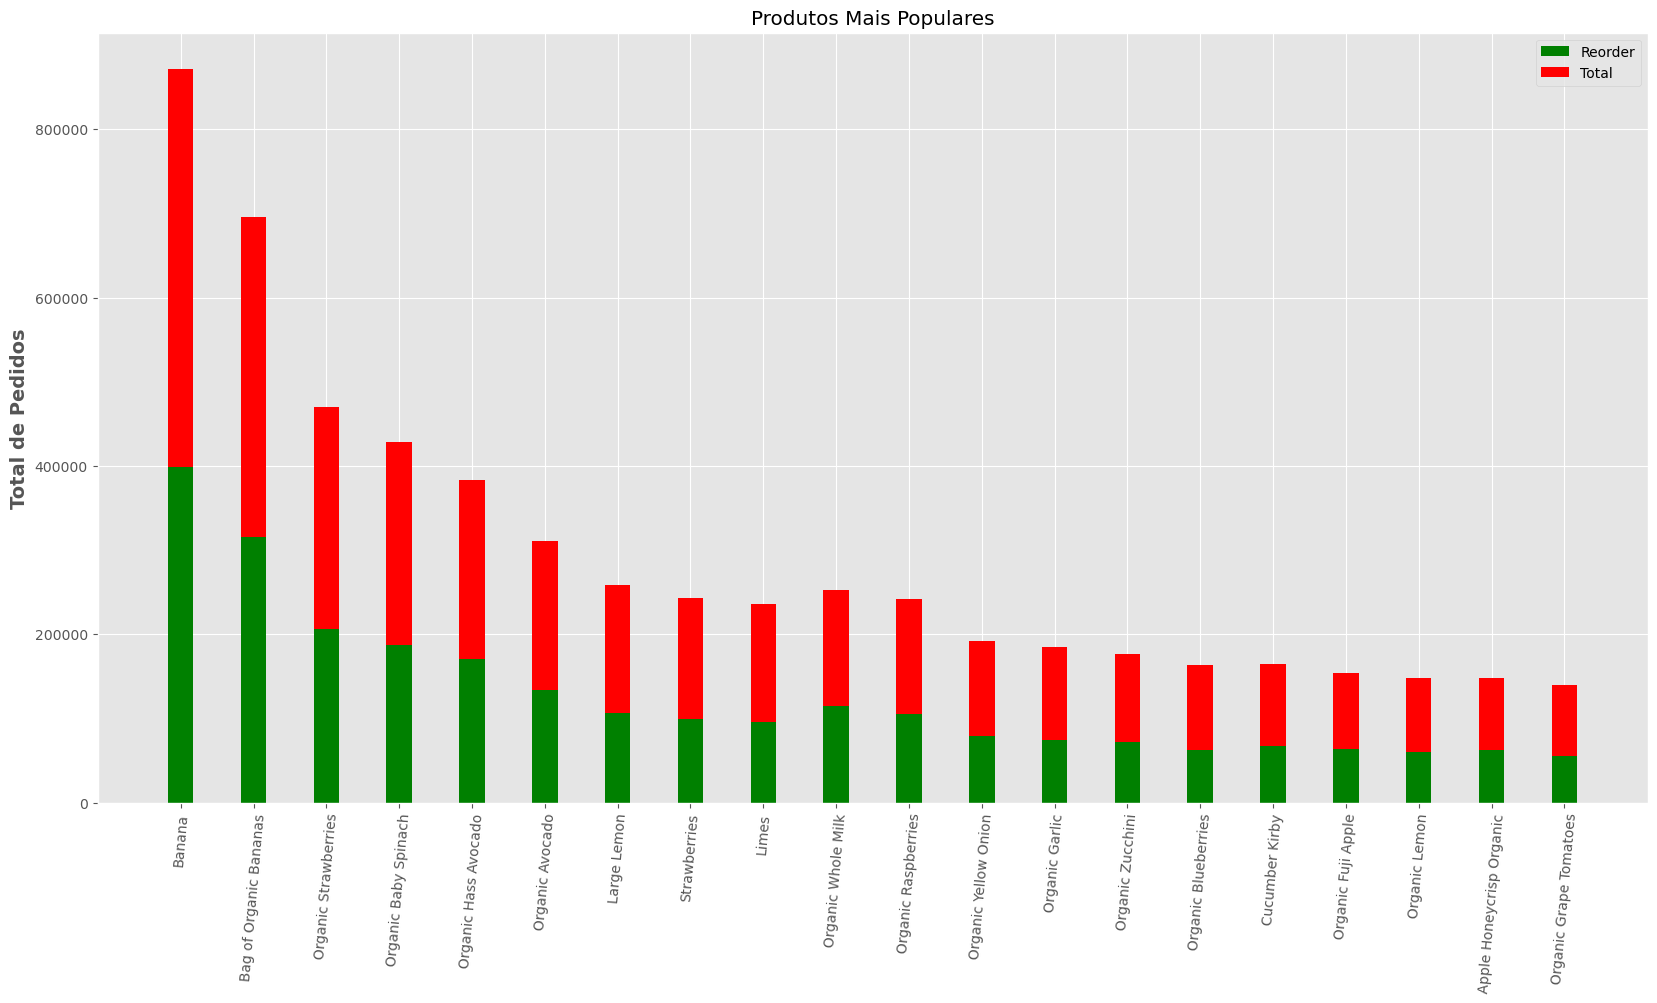

In [48]:
#Plot
width = 0.35
fig, ax = plt.subplots (figsize = (20,10))
ax.bar(labels, reorder, width, label = 'Reorder', color = 'green')
ax.bar(labels, total, width, bottom = reorder, label = 'Total', color = 'red')
ax.set_ylabel('Total de Pedidos', fontsize = 14, fontweight = 'bold')
ax.legend()
ax.set_title('Produtos Mais Populares')
plt.xticks(rotation = 85)
plt.show()

# Pergunta 8:

In [49]:
df_temp2 = dados_transacoes.groupby('department')['reordered'].aggregate('count').reset_index()
df_temp2

,department,reordered
0,alcohol,153696
1,babies,423802
2,bakery,1176787
3,beverages,2690129
4,breakfast,709569
5,bulk,34573
6,canned goods,1068058
7,dairy eggs,5414016
8,deli,1051249
9,dry goods pasta,866627


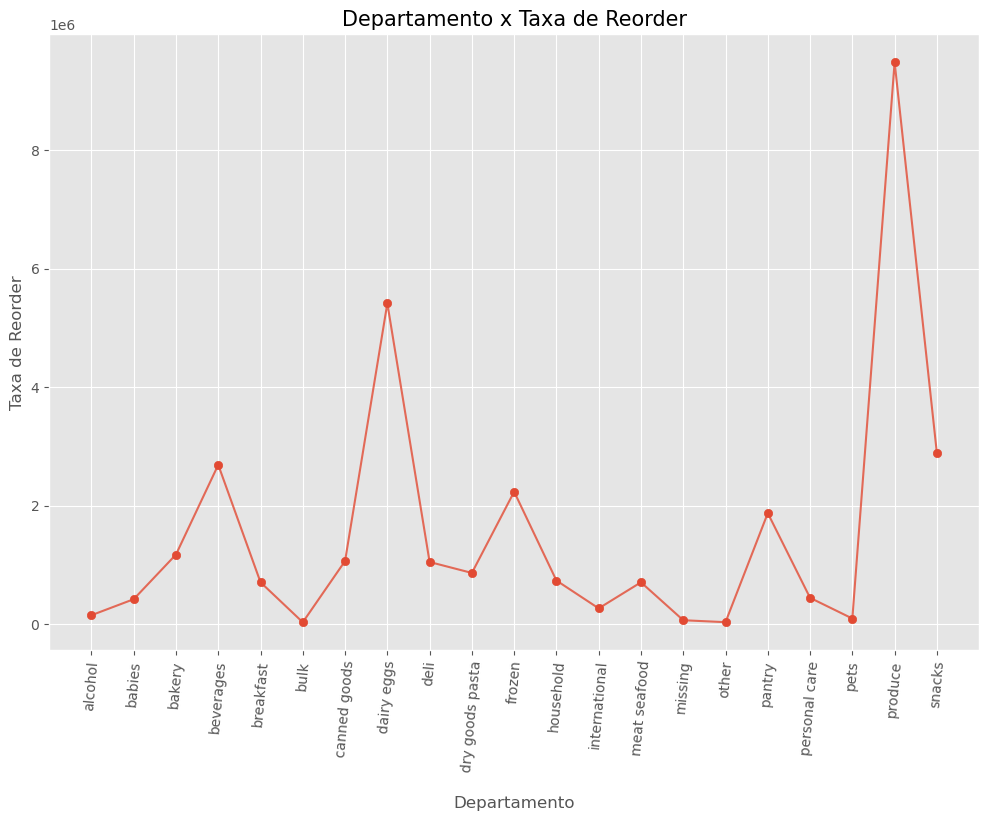

In [50]:
# Plot
plt.figure(figsize = (12,8))
plt.plot(list(df_temp2['department']), df_temp2['reordered'].values, alpha = 0.8)
plt.scatter(list(df_temp2['department']), df_temp2['reordered'].values)
plt.ylabel('Taxa de Reorder', fontsize = 12)
plt.xlabel('\nDepartamento', fontsize = 12)
plt.title('Departamento x Taxa de Reorder', fontsize = 15)
plt.xticks(rotation = 85)
plt.show()

In [51]:
df_temp2['reordered'].values

array([ 153696,  423802, 1176787, 2690129,  709569,   34573, 1068058,
       5414016, 1051249,  866627, 2236432,  738666,  269253,  708931,
         69145,   36291, 1875577,  447123,   97724, 9479291, 2887550],
      dtype=int64)

In [53]:
df_temp2['department']

0             alcohol
1              babies
2              bakery
3           beverages
4           breakfast
5                bulk
6        canned goods
7          dairy eggs
8                deli
9     dry goods pasta
10             frozen
11          household
12      international
13       meat seafood
14            missing
15              other
16             pantry
17      personal care
18               pets
19            produce
20             snacks
Name: department, dtype: object

# Pergunta 9:

In [54]:
df_temp3 = dados_transacoes.groupby('department')['reordered'].agg(['count', 'sum']).rename(columns = {'count':'total', 'sum':'reorder'})
df_temp3

,total,reorder
department,,
alcohol,153696,87595
babies,423802,245369
bakery,1176787,739188
beverages,2690129,1757892
breakfast,709569,398013
bulk,34573,19950
canned goods,1068058,488535
dairy eggs,5414016,3627221
deli,1051249,638864


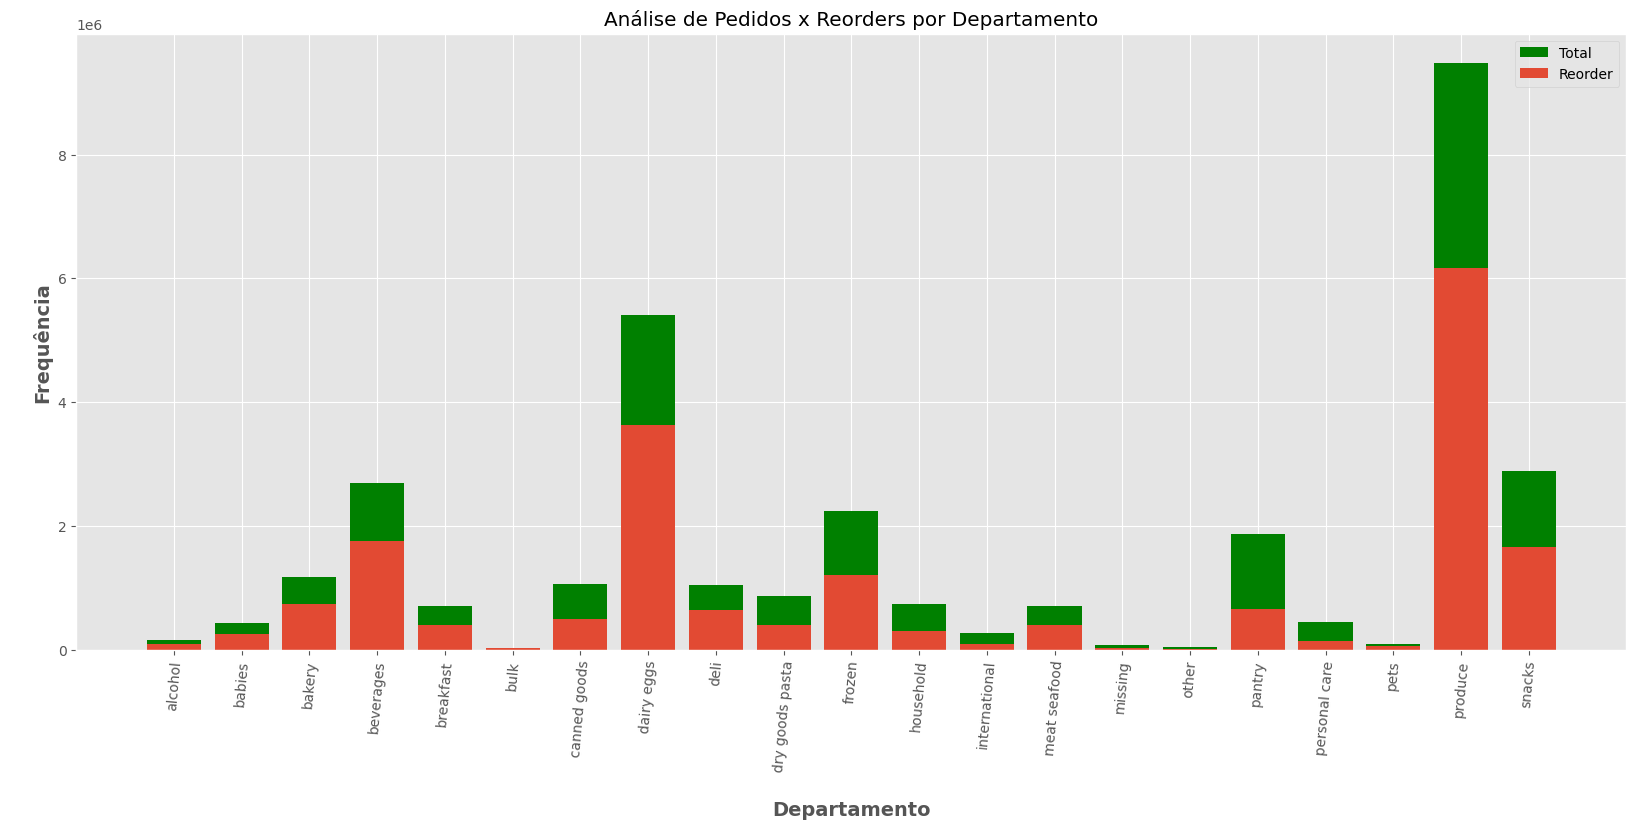

In [55]:
#Plot
plt.figure(figsize = (20,8))
plt.bar(df_temp3.index, df_temp3['total'], color = 'green', label = 'Total')
plt.bar(df_temp3.index, df_temp3['reorder'], label = 'Reorder')
plt.title('Análise de Pedidos x Reorders por Departamento')
plt.xlabel('\nDepartamento', weight = 'bold', fontsize = 14)
plt.ylabel('\nFrequência', weight = 'bold', fontsize = 14)
plt.legend()
plt.xticks(rotation = 85)
plt.show()

In [56]:
df_temp3.index

Index(['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk',
       'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen',
       'household', 'international', 'meat seafood', 'missing', 'other',
       'pantry', 'personal care', 'pets', 'produce', 'snacks'],
      dtype='object', name='department')

# Pergunta 10:

In [57]:
df_temp4 = dados_transacoes.groupby('aisle')['reordered'].mean().reset_index(name = 'media').head(20)
df_temp4

,aisle,media
0,air fresheners candles,0.309052
1,asian foods,0.351132
2,baby accessories,0.550980
3,baby bath body care,0.295770
4,baby food formula,0.590259
5,bakery desserts,0.499125
6,baking ingredients,0.305082
7,baking supplies decor,0.167229
8,beauty,0.212062
9,beers coolers,0.565304


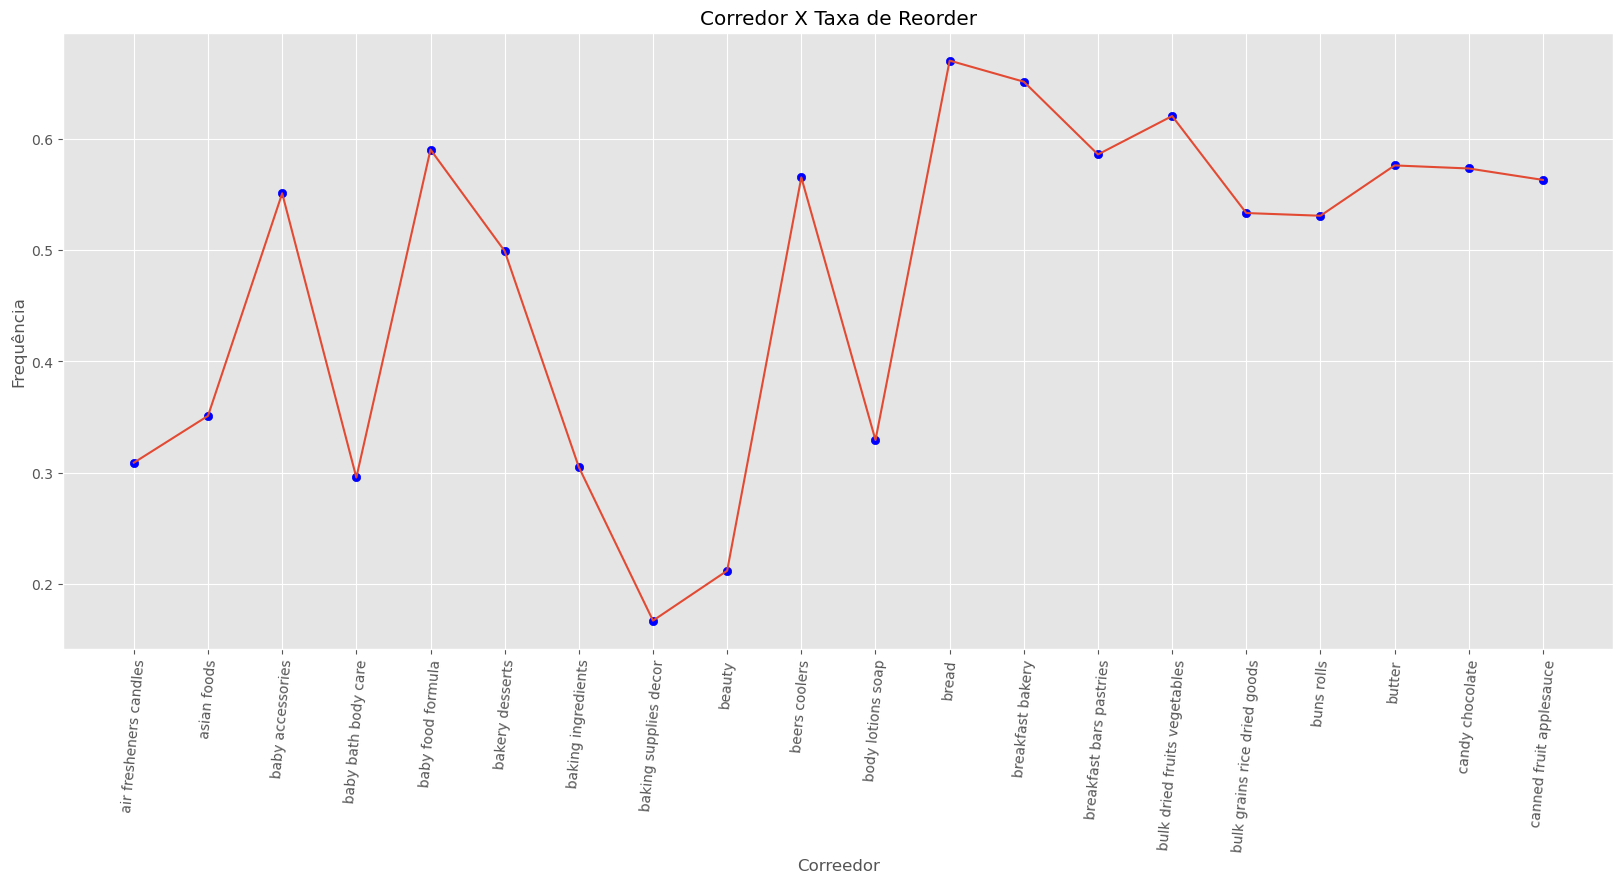

In [58]:
plt.figure(figsize = (20,8))
plt.plot(df_temp4['aisle'], df_temp4['media'])
plt.scatter(df_temp4.index, df_temp4['media'], color = 'blue')
plt.xticks(rotation = 85)
plt.ylabel('Frequência')
plt.xlabel('Correedor')
plt.title('Corredor X Taxa de Reorder')
plt.show()

> Vamos verificar a relação entre como a ordem de adição do produto ao arrinho afeta aproproção de novos pedidos

In [59]:
# Cria uma coóia de uma das colunas
dados_transacoes['add_to_cart_order_mod'] = dados_transacoes['add_to_cart_order'].copy()

In [60]:
dados_transacoes['add_to_cart_order'] > 70

0           False
1           False
2           False
3           False
4           False
            ...  
32434484    False
32434485    False
32434486    False
32434487    False
32434488    False
Name: add_to_cart_order, Length: 32434489, dtype: bool

In [61]:
#Localiza as transações
dados_transacoes['add_to_cart_order_mod'].loc[dados_transacoes['add_to_cart_order_mod'] > 70] = 70

In [62]:
# Calcuma a média e faz o reset do índice
grouped_df = dados_transacoes.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index

In [63]:
grouped_df

<bound method Series.reset_index of add_to_cart_order_mod
1     0.677533
2     0.676251
3     0.658037
4     0.636958
5     0.617383
        ...   
66    0.407002
67    0.397059
68    0.398352
69    0.393846
70    0.435714
Name: reordered, Length: 70, dtype: float64>

## Implementação do Algoritmo Apriori
O algoritmo Apriori é utilizado para análise de associação de regras, que é comumente usada em mineração de dados para descobrir relações entre variáveis em grandes bases de dados. Neste contexto, ele é usado para encontrar padrões de compras frequentes, ou seja, quais produtos são frequentemente comprados juntos.

In [64]:
transacoes.head()

,Id_Pedido,Produtos
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"


In [65]:
#Prepara a tupla com as transações
transacoes_tup = [tuple(row) for row in transacoes['Produtos'].tolist()]

Executa o Algoritmo Apriori Com Support = 0.01 e Confidence = 0.2
Vamos usar os 500000 primeiros registros para evitar sobrecarga de processamento.

In [66]:
%%time
itemsets_ap, rules_ap = apriori(transacoes_tup[:500000], min_support = 0.01, min_confidence = 0.2)

CPU times: total: 4.34 s
Wall time: 4.62 s


In [67]:
rules_ap

[{21137} -> {13176},
 {21903} -> {13176},
 {27966} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {21903} -> {24852},
 {28204} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852}]

In [68]:
# Vamos considerar alguns itens para nossa análise
item_A = [27966,47209,21137,47766,21903,49683,47626,28204,16797,21903,21137,27966]
item_B = [13176,13176,24852,24852,24852,24852,24852,24852,24852,13176,13176,21137]
temp = pd.DataFrame()
temp['itemA'] = item_A
temp['itemB'] = item_B

In [69]:
# Listas para as métricas
support_A = []
support_B = []
support_AB = []
confidence_AB = []
lift_AB = []

In [70]:
# Loop
for i in range(len(temp)):
    
    # Calcula o support de A
    support_A.append(itemsets_ap[1][tuple([temp['itemA'][i],])] / 500000)
    
    # Calcula o support de B
    support_B.append(itemsets_ap[1][tuple([temp['itemB'][i],])] / 500000)
    
    # Calcula o support de A e B
    if tuple([temp['itemA'][i],temp['itemB'][i]]) in itemsets_ap[2].keys():
        support_AB.append(itemsets_ap[2][tuple([temp['itemA'][i],temp['itemB'][i]])] / 500000)
    else:
        support_AB.append(itemsets_ap[2][tuple([temp['itemB'][i],temp['itemA'][i]])] / 500000)
    
    # Calcula a confidence
    confidence_AB.append(support_AB[i] / support_A[i])
    
    # Calcula o lift
    lift_AB.append(support_AB[i] / (support_A[i] * support_B[i]))

In [71]:
itemsets_ap[1][tuple([temp['itemA'][1],])]

33109

In [72]:
temp['itemA'][1]

47209

In [73]:
itemsets_ap[2].keys()

dict_keys([(13176, 21137), (13176, 21903), (13176, 27966), (13176, 47209), (16797, 24852), (21137, 21903), (21137, 24852), (21137, 27966), (21137, 47209), (21903, 24852), (21903, 47209), (24852, 28204), (24852, 47626), (24852, 47766), (24852, 49683)])

In [74]:
# Dataframe com as regras de associação
df_rules_ap = pd.DataFrame()
df_rules_ap['product_id'] = item_A
df_rules_ap = df_rules_ap.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap['Product_A'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['product_id'] = item_B
df_rules_ap = df_rules_ap.merge(dados_produtos, on = 'product_id', how = 'left')
df_rules_ap['Product_B'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['Support_A'] = support_A
df_rules_ap['Support_B'] = support_B
df_rules_ap['Support_AB'] = support_AB
df_rules_ap['Confidence_AB'] = confidence_AB
df_rules_ap['Lift_AB'] = lift_AB

In [78]:
df_rules_ap

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
2,Organic Strawberries,Banana,0.082550,0.147194,0.017596,0.213156,1.448127
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
4,Organic Baby Spinach,Banana,0.075000,0.147194,0.016016,0.213547,1.450784
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
9,Organic Baby Spinach,Bag of Organic Bananas,0.075000,0.117802,0.015500,0.206667,1.754356
